# CAISO OASIS Data downloader

Data taken from [CAISO Oasis portal](http://oasis.caiso.com/mrioasis)

API documentation located [here](http://www.caiso.com/Documents/OASIS-InterfaceSpecification_v5_1_3Clean_Fall2017Release.pdf)


| SubLAP                      | Node Name                                                                                                                                             |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| Pacific Gas & Electric      | 'PGCC', 'PGEB', 'PGF1', 'PGFG', 'PGHB', 'PGKN', 'PGLP', 'PGNB', 'PGNC', 'PGNP','PGNV', 'PGP2', 'PGSA', 'PGSB', 'PGSF', 'PGSI', 'PGSN', 'PGST', 'PGZP' |
| Southern California Edison  | 'SCEC', 'SCEN', 'SCEW', 'SCHD', 'SCLD', 'SCNW'                                                                                                        |
| San Diego Gas & Electric    | 'SDG1'                                                                                                                                                |
| Valley Electric Association | 'VEA'                                                                                                                                                 |



In [19]:
## Import required libraries
import requests
from selenium import webdriver
from functools import reduce
import pandas as pd
import zipfile as zp
import time
import os
import glob
import altair as alt
from altair_saver import save

In [2]:
## Define required variables
month_dict = {'Jan': ['0101', '0131'],
              'Feb': ['0201', '0228'],
              'Mar': ['0301', '0331'],
              'Apr': ['0401', '0430'],
              'May': ['0501', '0531'],
              'Jun': ['0601', '0630'],
              'Jul': ['0701', '0731'],
              'Aug': ['0801', '0831'],
              'Sep': ['0901', '0930'],
              'Oct': ['1001', '1031'],
              'Nov': ['1101', '1130'],
              'Dec': ['1201', '1231']
              }

node_list = ['PGCC', 'PGEB', 'PGF1', 'PGFG', 'PGHB', 'PGKN', 'PGLP', 'PGNB', 'PGNC', 'PGNP', 
             'PGNV', 'PGP2', 'PGSA', 'PGSB', 'PGSF', 'PGSI', 'PGSN', 'PGST', 'PGZP',
             'SCEC', 'SCEN', 'SCEW', 'SCHD', 'SCLD', 'SCNW', 'SDG1', 'VEA']

node_dict = {}
for node in node_list:
    node_dict[node] = 'SLAP_' + node + '-APND'


In [3]:
def extract_hourly_data(year, nodes):
    """
    Downloads Southern California monthly energy prices from CAISO's Oasis Portal for a year of choice
    and aggregates separate files into a single csv file
  
    Parameters:
    year:  str
    
    Outputs:
    None
    
    Example:
    extract_monthly_data(2017)
    
    """
    node_entry = reduce(lambda x, y: x +','+ y, list(map(lambda x: 'SLAP_' + x + '-APND', nodes)))
    name_entry = reduce(lambda x, y: x +','+ y, nodes)
    
    chrome_options = webdriver.ChromeOptions()
    prefs = {'download.default_directory' : \
             '/Users/jaromeleslie/Documents/MDS/Personal_projects/CAISOprices/data/'+str(year)}
    chrome_options.add_experimental_option('prefs', prefs)

    driver = webdriver.Chrome(chrome_options=chrome_options)
    for month in month_dict.keys():
        api_call = "http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=" +\
            str(year)+month_dict[month][0] + "T07:00-0000&enddatetime=" +  str(year)+month_dict[month][1] + \
            f"T07:00-0000&version=1&market_run_id=DAM&node={node_entry}"
        
        print(api_call)
        driver.get(api_call)
        time.sleep(15)
        
    zip_files = glob.glob('../data/' +str(year)+'/*.zip')
    for zip_filename in zip_files:
        dir_name = os.path.splitext(zip_filename)[0]
        
        if not os.path.isdir(dir_name):
            os.mkdir(dir_name)
        zip_handler = zp.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)

    # path = dir_name
    csv_files = glob.glob('../data/' + str(year) +'/*/*.csv')

    entries =[]

    for csv in csv_files:
        entries.append(pd.read_csv(csv))


    combined_csvs = pd.concat(entries)
    
    combined_csvs.to_csv(f"../data/{str(year)}/{str(year)}_{name_entry}.csv")   
    driver.close()
    print("Download and aggregation complete!")
    return combined_csvs

In [4]:
test_2_2019 = extract_hourly_data(2019, ['SCEC', 'SCEN'])

/Users/jaromeleslie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: use options instead of chrome_options


http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=20190101T07:00-0000&enddatetime=20190131T07:00-0000&version=1&market_run_id=DAM&node=SLAP_SCEC-APND,SLAP_SCEN-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=20190201T07:00-0000&enddatetime=20190228T07:00-0000&version=1&market_run_id=DAM&node=SLAP_SCEC-APND,SLAP_SCEN-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=20190301T07:00-0000&enddatetime=20190331T07:00-0000&version=1&market_run_id=DAM&node=SLAP_SCEC-APND,SLAP_SCEN-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=20190401T07:00-0000&enddatetime=20190430T07:00-0000&version=1&market_run_id=DAM&node=SLAP_SCEC-APND,SLAP_SCEN-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&resultformat=6&startdatetime=20190501T07:00-0000&enddatetime=20190531T07:00-0000&version=1&market_run_id=DAM&node=SLAP_SCEC-

In [6]:
test_2_2019.XML_DATA_ITEM.unique()

array(['LMP_PRC', 'LMP_CONG_PRC', 'LMP_ENE_PRC', 'LMP_LOSS_PRC',
       'LMP_GHG_PRC'], dtype=object)

In [3]:
sample_day = test_2_2019.query('OPR_DT == "2019-06-01"').query('NODE == "SLAP_SCEC-APND"')
sample_day

NameError: name 'test_2_2019' is not defined

In [4]:
read_test = pd.read_csv('../data/2019/2019_SCEC,SCEN.csv')

In [10]:
sample_day = read_test.query('OPR_DT == "2019-06-01"').query('NODE == "SLAP_SCEC-APND" and XML_DATA_ITEM == "LMP_PRC"')
sample_day

,Unnamed: 0,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP
0,0,2019-06-01T20:00:00-00:00,2019-06-01T21:00:00-00:00,2019-06-01,14,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,3.71748,1
1,1,2019-06-02T05:00:00-00:00,2019-06-02T06:00:00-00:00,2019-06-01,23,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,23.93437,1
2,2,2019-06-01T14:00:00-00:00,2019-06-01T15:00:00-00:00,2019-06-01,8,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,8.02137,1
3,3,2019-06-01T17:00:00-00:00,2019-06-01T18:00:00-00:00,2019-06-01,11,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,1.01638,1
4,4,2019-06-01T18:00:00-00:00,2019-06-01T19:00:00-00:00,2019-06-01,12,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,0.94995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453508,19,2019-06-01T08:00:00-00:00,2019-06-01T09:00:00-00:00,2019-06-01,2,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,18.59559,1
453509,20,2019-06-01T13:00:00-00:00,2019-06-01T14:00:00-00:00,2019-06-01,7,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,17.52041,1
453510,21,2019-06-02T00:00:00-00:00,2019-06-02T01:00:00-00:00,2019-06-01,18,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,17.32728,1
453511,22,2019-06-02T04:00:00-00:00,2019-06-02T05:00:00-00:00,2019-06-01,22,0,SLAP_SCEC-APND,SLAP_SCEC-APND,SLAP_SCEC-APND,DAM,LMP,LMP_PRC,SLAP_SCEC-APND,ALL_APNODES,0,31.25796,1


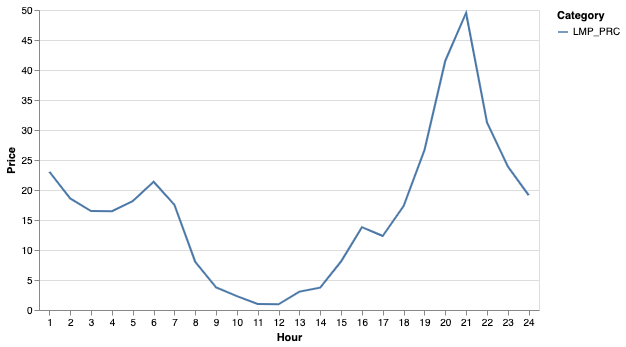

In [20]:
sample_chart = alt.Chart(sample_day).mark_line().encode(
    x=alt.X('OPR_HR:O', axis=alt.Axis(title='Hour',format=',.0f', labelAngle=0)),
    y=alt.Y('MW:Q', axis = alt.Axis( title='Price')),
    color=alt.Color('XML_DATA_ITEM', legend=alt.Legend(title = 'Category',orient="right"))
   
).properties(title="", width=500).interactive()

sample_chart

In [21]:
save(sample_chart, "../img/sample_day.png") 

NoMatchingVersions: No matches for version='3.4.0' among ['4.0.2', '4.8.1'].
Often this can be fixed by updating altair_viewer:
    pip install -U altair_viewer

In [68]:
combined_csvs['NODE_ID'].unique()

array(['SLAP_SCEC-APND', 'SLAP_SCEN-APND', 'SLAP_SCEW-APND',
       'SLAP_SCHD-APND', 'SLAP_SCLD-APND'], dtype=object)

In [14]:
def extract_5min_data(year, node):
    chrome_options = webdriver.ChromeOptions()
    prefs = {'download.default_directory' : '/Users/jaromeleslie/Documents/MDS/Personal_projects/CAISO_oasis_extractor/data/5min/'+str(year)}
    chrome_options.add_experimental_option('prefs', prefs)

    driver = webdriver.Chrome(chrome_options=chrome_options)
    for month in month_dict.keys():
        api_call = "http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=" + str(year)+month_dict[month][0] + "T07:00-0000&enddatetime=" +  str(year)+month_dict[month][1] + "T07:00-0000&version=1&market_run_id=HASP&node=" + node
        print(api_call)
        driver.get(api_call)
        time.sleep(15)
        
    zip_files = glob.glob('../data/5min/' +str(year)+'/*.zip')
    for zip_filename in zip_files:
        dir_name = os.path.splitext(zip_filename)[0]
        os.mkdir(dir_name)
        zip_handler = zp.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)

    # path = dir_name
    csv_files = glob.glob('../data/5min/' + str(year) +'/*/*.csv')

    entries =[]

    for csv in csv_files:
        entries.append(pd.read_csv(csv))


    combined_csvs = pd.concat(entries)
    combined_csvs.to_csv('../data/5min/' + str(year) +'/'+ str(year) + node +'.csv')   

In [12]:
extract_5min_data(2018, "CLEARKE_6_N012")

/Users/jaromeleslie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=20180101T07:00-0000&enddatetime=20180131T07:00-0000&version=1&market_run_id=HASP&node=CLEARKE_6_N012
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=20180201T07:00-0000&enddatetime=20180228T07:00-0000&version=1&market_run_id=HASP&node=CLEARKE_6_N012
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=20180301T07:00-0000&enddatetime=20180331T07:00-0000&version=1&market_run_id=HASP&node=CLEARKE_6_N012
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=20180401T07:00-0000&enddatetime=20180430T07:00-0000&version=1&market_run_id=HASP&node=CLEARKE_6_N012
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_INTVL_LMP&resultformat=6&startdatetime=20180501T07:00-0000&enddatetime=20180531T07:00-0000&version=1&market_run_id=HASP&node=CLEARKE_6_N012
http://oasis.caiso.c

ValueError: No objects to concatenate

In [85]:
extract_monthly_15min_data(2019, "SLAP_SCEC-APND")

/Users/jaromeleslie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_HASP_LMP&resultformat=6&startdatetime=20190101T07:00-0000&enddatetime=20190131T07:00-0000&version=1&market_run_id=HASP&node=SLAP_SCEC-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_HASP_LMP&resultformat=6&startdatetime=20190201T07:00-0000&enddatetime=20190228T07:00-0000&version=1&market_run_id=HASP&node=SLAP_SCEC-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_HASP_LMP&resultformat=6&startdatetime=20190301T07:00-0000&enddatetime=20190331T07:00-0000&version=1&market_run_id=HASP&node=SLAP_SCEC-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_HASP_LMP&resultformat=6&startdatetime=20190401T07:00-0000&enddatetime=20190430T07:00-0000&version=1&market_run_id=HASP&node=SLAP_SCEC-APND
http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_HASP_LMP&resultformat=6&startdatetime=20190501T07:00-0000&enddatetime=20190531T07:00-0000&version=1&market_run_id=HASP&node=SLAP_SCEC-APND
http://oasis.caiso.com/oa